<a href="https://colab.research.google.com/github/Royalrival/Machine_learning_project/blob/main/Cancer_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# correct the code below
# refer pandas documentation for the correct syntax
df = pd.read_csv('/content/breast_cancer_survival.csv')
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive


In [ ]:
df.head(31)
#similarly the first 31 rows

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
5,80,FEMALE,0.466470,2.57970,-1.253700,0.151540,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jun-18,16-Feb-19,Alive
6,66,FEMALE,-0.724860,-0.28289,0.959430,0.350900,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,27-Oct-18,19-Jun-19,Alive
7,36,FEMALE,0.469310,1.55260,-0.165240,-0.275990,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,19-Jul-18,30-Jun-19,Alive
8,58,FEMALE,-1.268500,0.10613,1.135200,-0.394920,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,15-Jun-18,16-Dec-19,Alive
9,62,FEMALE,0.649340,1.81680,0.279260,0.132280,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,20-Jun-19,NaN,NaN


In [ ]:
#Check if the dataset has null values and specify those columns
#Enter code below
a=df.isnull().any()
a

Age                   False
Gender                False
Protein1              False
Protein2              False
Protein3              False
Protein4              False
Tumour_Stage          False
Histology             False
ER status             False
PR status             False
HER2 status           False
Surgery_type          False
Date_of_Surgery       False
Date_of_Last_Visit     True
Patient_Status         True
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

In [ ]:
# Drop the entire column if the percentage of null values to the total rows is greater than 10%
# If less than 10% then drop the null values directly
#Enter code below
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 317 non-null    int64  
 1   Gender              317 non-null    object 
 2   Protein1            317 non-null    float64
 3   Protein2            317 non-null    float64
 4   Protein3            317 non-null    float64
 5   Protein4            317 non-null    float64
 6   Tumour_Stage        317 non-null    object 
 7   Histology           317 non-null    object 
 8   ER status           317 non-null    object 
 9   PR status           317 non-null    object 
 10  HER2 status         317 non-null    object 
 11  Surgery_type        317 non-null    object 
 12  Date_of_Surgery     317 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      317 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.6+ K

In [ ]:
df.duplicated()
#Find and eliminate duplicate values if any
#Since no duplicates except False values so no need to do drop_duplicates()

0      False
1      False
2      False
3      False
4      False
       ...  
329    False
330    False
331    False
332    False
333    False
Length: 317, dtype: bool

Visualizations

In [ ]:
#Find the number of patients of each Tumour Stage and visualize it using a pie-chart.
ts=df["Tumour_Stage"].value_counts(ascending=True)
ts

I       60
III     77
II     180
Name: Tumour_Stage, dtype: int64

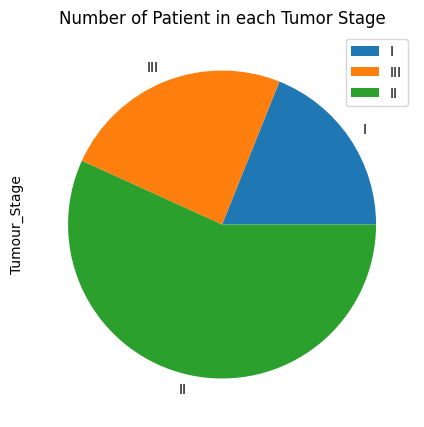

In [ ]:
ts.plot(
    kind="pie", figsize=(10, 5), title="Number of Patient in each Tumor Stage"
)
plt.legend()
plt.show()

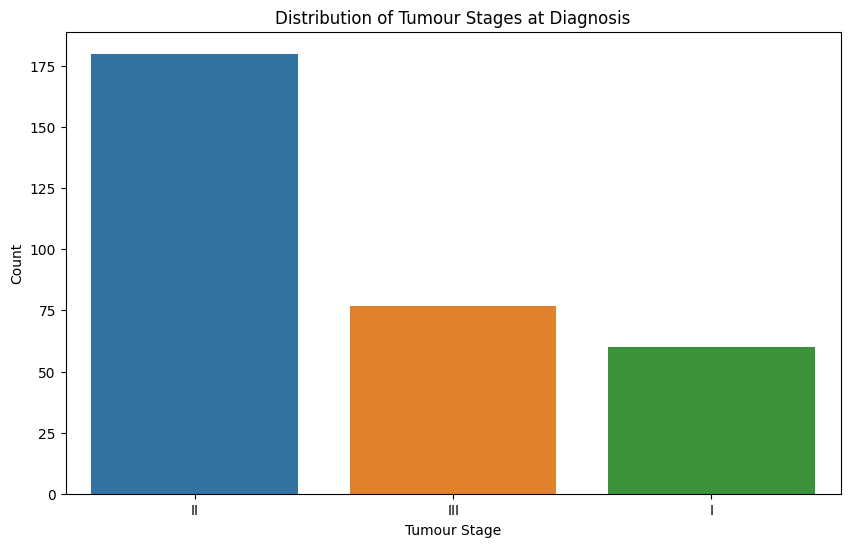

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Tumour_Stage', data=df, order=df['Tumour_Stage'].value_counts().index)
plt.title('Distribution of Tumour Stages at Diagnosis')
plt.xlabel('Tumour Stage')
plt.ylabel('Count')
# plt.hist(df['Tumour_Stage'].value_counts(), bins = 3, edgecolor = 'black')
# plt.margins(x=0,y=0)
plt.show()
plt.tight_layout()
#It shouldnt have space in between columns and order should be II I III

In [ ]:
#Rename the Patient_Status as Target and Give labels Alive = 1 and Dead = 0
# df.rename(columns = {'Patient_Status':'Target'}, inplace = True)
# from sklearn.preprocessing import LabelEncoder
# le1=LabelEncoder() #object-creation
# df['Target']=le1.fit_transform(df['Target'])
# df
df['Target'] = df['Patient_Status'].apply(lambda x: 1 if x == 'Alive' else 0)
df.drop(['Patient_Status'], axis=1, inplace=True)


In [ ]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Target
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,1
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,0
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,1
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,1
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,1


In [ ]:
#Bin the age column
# Create a new column 'age_bins' with the Age values binned as [0, 20, 40, 60, 80, 100]
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-19', '20-39', '40-59', '60-79', '80-100']
df['age_bins'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

#https://pandas.pydata.org/docs/reference/api/pandas.cut.html

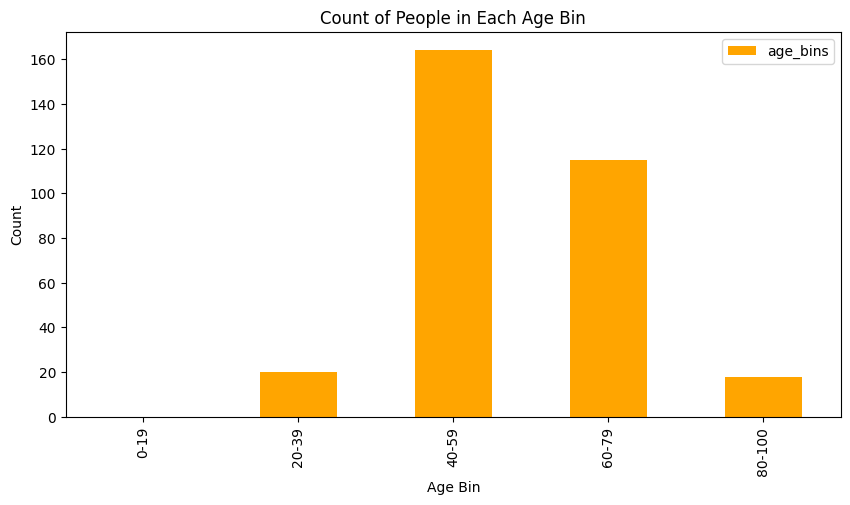

In [ ]:
# plot the count of people in each age bin using a histogram
# df.groupby['age_bins'].value_counts().sort_index().unstack().plot.hist()
# plt.hist(df['Age'], bins = df['age_bins'], edgecolor = 'black')
# df.groupby('age_bins')['Age'].count().plot.hist()
# plt.show()
# Create a bar plot for Count of People in Each Age Bin
plt.figure(figsize=(10, 5))
df['age_bins'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Count of People in Each Age Bin')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.legend()
plt.show()

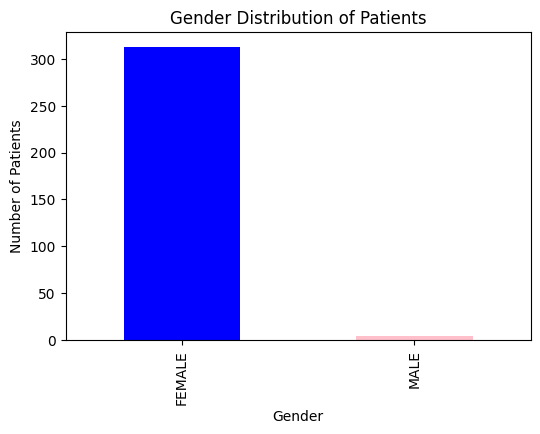

In [ ]:
# Make a chart showcasing number of male and female patients in the given data, explain why the data has more values of one gender over the other
gc = df['Gender'].value_counts()
plt.figure(figsize=(6, 4))
gc.plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution of Patients')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()
# Data has more value in one gender because it may be the case of low screening in males. Also it may be due to breast cancer more common in females resulting in a large female dataset.


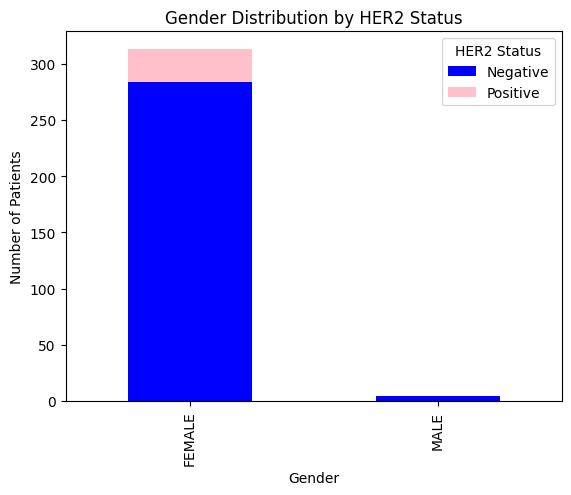

In [ ]:
gender_her2_counts = df.groupby(['Gender', 'HER2 status']).size().unstack()
gender_her2_counts.plot(kind='bar', stacked=True, color=['blue', 'pink'])
plt.title('Gender Distribution by HER2 Status')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend(title='HER2 Status')
plt.show()
# Through this graph we can observe that all males have HER2 status negative whereas in females Majority have negative status however few have positive HER2 status

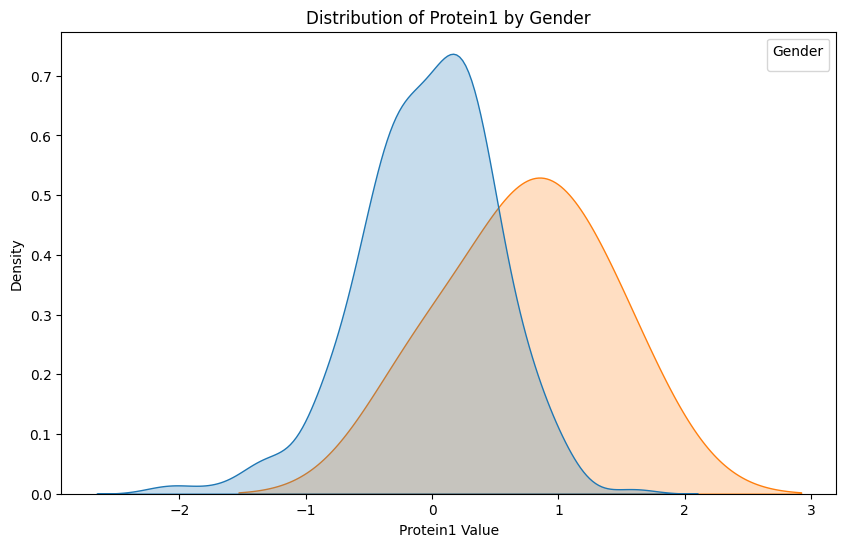

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Protein1', hue='Gender', common_norm=False, fill=True)
plt.title('Distribution of Protein1 by Gender')
plt.xlabel('Protein1 Value')
plt.ylabel('Density')
plt.legend(title='Gender')
plt.show()


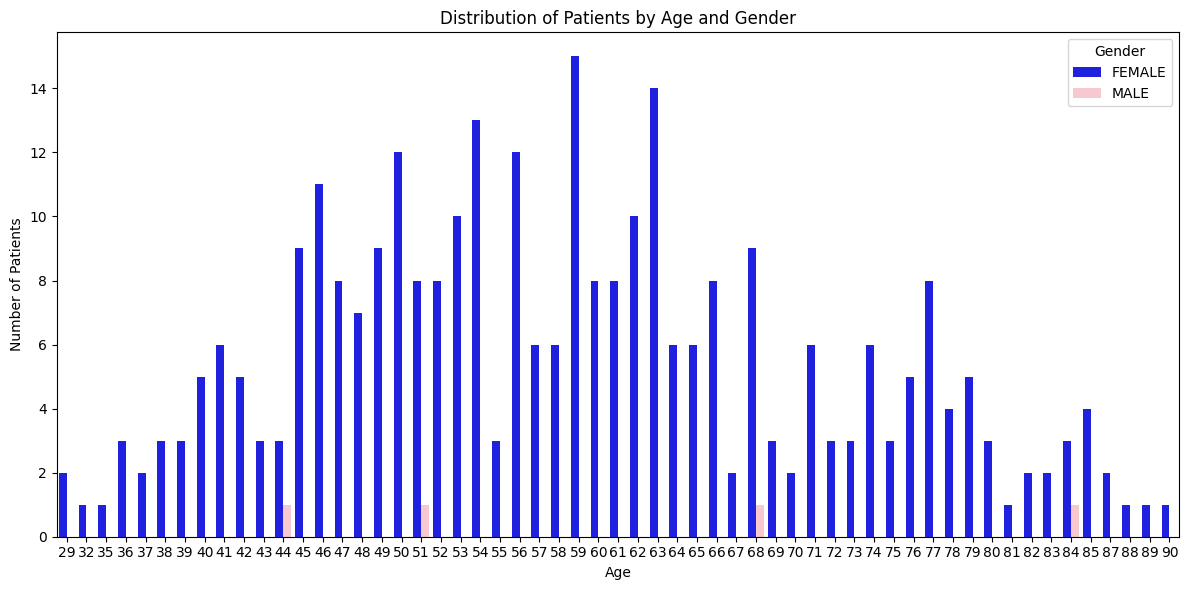

In [ ]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age', hue='Gender', palette=['blue', 'pink'])
plt.title('Distribution of Patients by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [ ]:
# diplay counts of pateints with differnent breast cancer types (Histology)

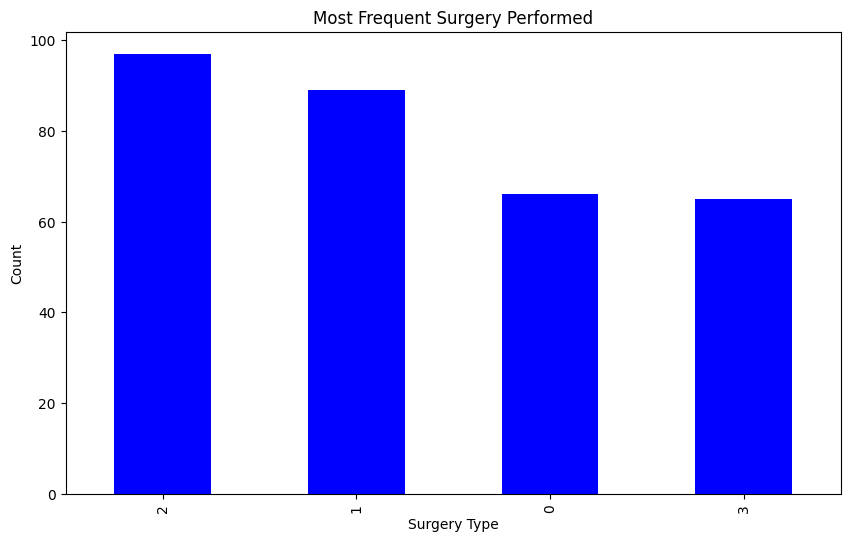

In [ ]:
# Find out the most frequent surgery performed
surgery_counts = df['Surgery_type'].value_counts()
plt.figure(figsize=(10, 6))
surgery_counts.plot(kind='bar', color='blue')
plt.title('Most Frequent Surgery Performed')
plt.xlabel('Surgery Type')
plt.ylabel('Count')
plt.show()

<Figure size 1200x600 with 0 Axes>

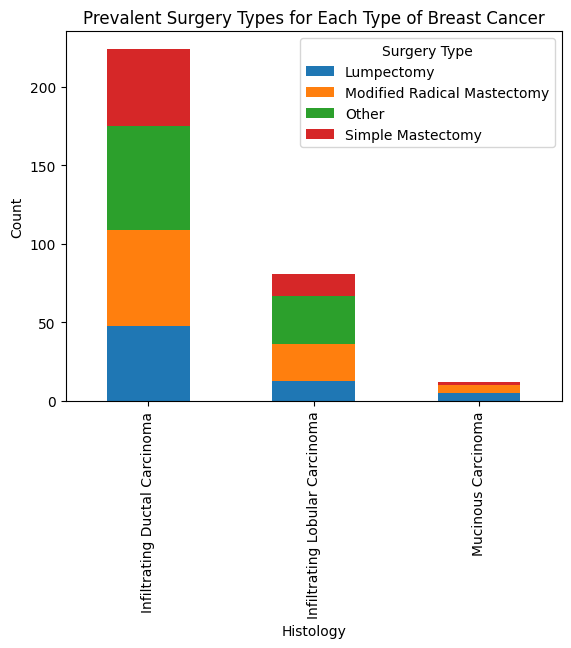

In [ ]:
# Find out prevalent surgery types for each type of breast cancer
surgery_counts = df.groupby(['Histology', 'Surgery_type']).size().reset_index(name='Count')
pivot_table = surgery_counts.pivot(index='Histology', columns='Surgery_type', values='Count')

plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', stacked=True)
plt.title('Prevalent Surgery Types for Each Type of Breast Cancer')
plt.xlabel('Histology')
plt.ylabel('Count')
plt.legend(title='Surgery Type')
plt.show()

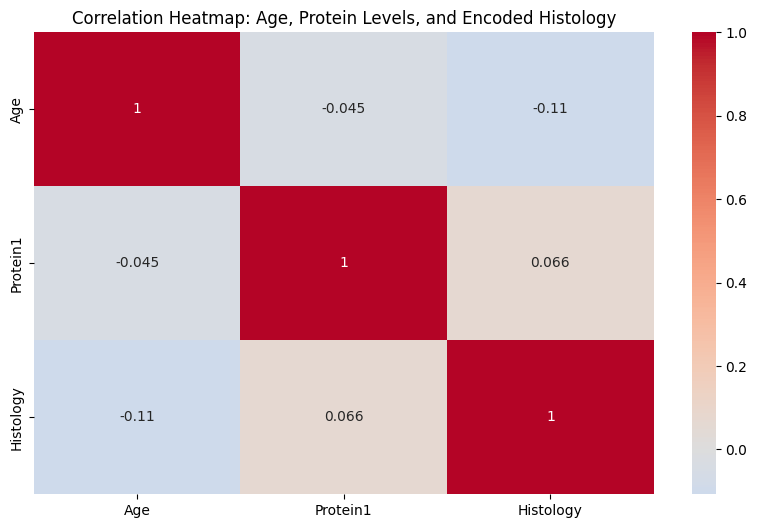

In [ ]:
# find out the co-realtion between age protien levels and the type of breast cancer (make a heatmap)
from sklearn.preprocessing import LabelEncoder
le2=LabelEncoder()
df['Histology']=le2.fit_transform(df['Histology'])
columns_to_correlate = ['Age', 'Protein1', 'Histology']
correlation_matrix = df[columns_to_correlate].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Age, Protein Levels, and Encoded Histology')
plt.show()


In [ ]:
# What was your analysis of the entire dataset from the above colab notebook
# 1) Females are more prone to Breast Cancer than Males according to the data.(Though it may also be due to less awareness and screening of males)
# 2) Infiltrating Ductal Carcinoma is the mot common type of cancer detected followed by Infiltrating Lobular Carcinoma and lastly by Mucinous Carcinoma
# 3) Highest count of the cancer was found in females having age 59. Concentration of patients having cancer in age 40 to 59 is high followed by 60-79 age group.
# 4) Two of the most performed surgery for diagnosis of Brast Cancer is Modified Radical Mastectomy and some other unspecifed treatment followed by rest two.
# 5) More than half of the tumour diagnosed were of Stage II during diagnosis.
# 6) Maximum females and males have HER2 status negative except a few females with positive status

In [ ]:
df.isnull().sum()
# df.drop()



Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Target                0
age_bins              0
dtype: int64

In [ ]:
df


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Target,age_bins
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,0,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,1,40-59
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,0,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,0,40-59
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,0,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,1,60-79
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,0,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,1,60-79
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,0,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,1,40-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,0,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,1,40-59
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,0,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,1,40-59
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,0,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,0,40-59
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,1,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,1,60-79


In [ ]:
df.columns


Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit', 'Target',
       'age_bins'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le3=LabelEncoder()
df['ER status']=le3.fit_transform(df['ER status'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le4=LabelEncoder()
df['PR status']=le4.fit_transform(df['PR status'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le5=LabelEncoder()
df['HER2 status']=le5.fit_transform(df['HER2 status'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le6=LabelEncoder()
df['Tumour_Stage']=le6.fit_transform(df['Tumour_Stage'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le7=LabelEncoder()
df['Surgery_type']=le7.fit_transform(df['Surgery_type'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le8=LabelEncoder()
df['Gender']=le8.fit_transform(df['Gender'])

In [ ]:
df.head()


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Target,age_bins
0,42,0,0.95256,2.15000,0.007972,-0.048340,1,0,0,0,0,2,20-May-18,26-Aug-18,1,40-59
1,54,0,0.00000,1.38020,-0.498030,-0.507320,1,0,0,0,0,2,26-Apr-18,25-Jan-19,0,40-59
2,63,0,-0.52303,1.76400,-0.370190,0.010815,1,0,0,0,0,0,24-Aug-18,08-Apr-20,1,60-79
3,78,0,-0.87618,0.12943,-0.370380,0.132190,0,0,0,0,0,2,16-Nov-18,28-Jul-20,1,60-79
4,42,0,0.22611,1.74910,-0.543970,-0.390210,1,0,0,0,1,0,12-Dec-18,05-Jan-19,1,40-59


In [ ]:
X=df.iloc[:,:-2]
X.drop(['Date_of_Surgery', 'Date_of_Last_Visit'],axis=1,inplace=True)
Y=df.iloc[:,-2:-1]

In [ ]:
X

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type
0,42,0,0.952560,2.15000,0.007972,-0.048340,1,0,0,0,0,2
1,54,0,0.000000,1.38020,-0.498030,-0.507320,1,0,0,0,0,2
2,63,0,-0.523030,1.76400,-0.370190,0.010815,1,0,0,0,0,0
3,78,0,-0.876180,0.12943,-0.370380,0.132190,0,0,0,0,0,2
4,42,0,0.226110,1.74910,-0.543970,-0.390210,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,0,0.024598,1.40050,0.024751,0.280320,1,0,0,0,1,0
330,41,0,0.100120,-0.46547,0.472370,-0.523870,0,0,0,0,1,1
331,54,0,0.753820,1.64250,-0.332850,0.857860,1,0,0,0,0,3
332,74,0,0.972510,1.42680,-0.366570,-0.107820,1,1,0,0,0,0


In [ ]:
Y

,Target
0,1
1,0
2,1
3,1
4,1
...,...
329,1
330,1
331,0
332,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train2, Y_train2 = smote.fit_resample(X_train, Y_train)
X_test2, Y_test2 = smote.fit_resample(X_test, Y_test)

In [ ]:
#LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state = 42)
classifier2.fit(X_train2, Y_train2)

Y_pred = classifier2.predict(X_test2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test2,Y_pred))

              precision    recall  f1-score   support

           0       0.58      0.63      0.60        51
           1       0.60      0.55      0.57        51

    accuracy                           0.59       102
   macro avg       0.59      0.59      0.59       102
weighted avg       0.59      0.59      0.59       102



In [ ]:
# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier(max_depth=20)
classifier2.fit(X_train2,Y_train2)

Y_pred = classifier2.predict(X_test2)

In [ ]:
pd.Series(Y_pred).value_counts()

0    53
1    49
dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test2,Y_pred))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63        51
           1       0.63      0.61      0.62        51

    accuracy                           0.63       102
   macro avg       0.63      0.63      0.63       102
weighted avg       0.63      0.63      0.63       102



In [ ]:
Y_pred2=classifier2.predict(X_train2)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_train2,Y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       204
           1       1.00      1.00      1.00       204

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



In [ ]:
# XGB Booster

In [ ]:
from xgboost import XGBClassifier
classifier2=XGBClassifier()
classifier2.fit(X_train2,Y_train2)

Y_pred = classifier2.predict(X_test2)

In [ ]:
pd.Series(Y_pred).value_counts()

1    72
0    30
dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test2,Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.41      0.52        51
           1       0.58      0.82      0.68        51

    accuracy                           0.62       102
   macro avg       0.64      0.62      0.60       102
weighted avg       0.64      0.62      0.60       102



In [ ]:
Y_pred2=classifier2.predict(X_train2)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_train2,Y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       204
           1       1.00      1.00      1.00       204

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



In [ ]:
pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
models_to_include = ['LogisticRegression', 'RandomForestClassifier', 'XGBClassifier']
#On imbalanced dataset
clf = LazyClassifier(models_to_include)
models = clf.fit(X_train, X_test, Y_train, Y_test)
print(models)

 97%|█████████▋| 28/29 [00:08<00:00,  1.42it/s]

[LightGBM] [Info] Number of positive: 204, number of negative: 49
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 253, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.806324 -> initscore=1.426300
[LightGBM] [Info] Start training from score 1.426300
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████| 29/29 [00:08<00:00,  3.30it/s]

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreeClassifier                0.80               0.67     0.67      0.79   
LabelPropagation                   0.70               0.61     0.61      0.72   
LabelSpreading                     0.70               0.61     0.61      0.72   
PassiveAggressiveClassifier        0.69               0.55     0.55      0.70   
SGDClassifier                      0.81               0.54     0.54      0.74   
BaggingClassifier                  0.77               0.54     0.54      0.73   
XGBClassifier                      0.80               0.53     0.53      0.73   
AdaBoostClassifier                 0.75               0.53     0.53      0.72   
CalibratedClassifierCV             0.80               0.50     0.50      0.71   
SVC                                0.80               0.50     0.50      0.71   
DummyClassifier            

In [ ]:
models_to_include = ['LogisticRegression', 'RandomForestClassifier', 'XGBClassifier']

# On blanced dataset
clf = LazyClassifier(models_to_include)
models = clf.fit(X_train2, X_test2, Y_train2, Y_test2)
print(models)

100%|██████████| 29/29 [00:01<00:00, 17.11it/s]

[LightGBM] [Info] Number of positive: 204, number of negative: 204
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive